<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_make_full_binary_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recall that a full binary tree is one in which each node is either a leaf node, or has two children. Given a binary tree, convert it to a full one by removing nodes with only one child.

For example, given the following tree:
````
         0
      /     \
    1         2
  /            \
3                 4
  \             /   \
    5          6     7

````
You should convert it to:
````
     0
  /     \
5         4
        /   \
       6     7

````


To solve the problem of converting a given binary tree into a full binary tree by removing nodes with only one child, we need to traverse the tree and prune such nodes. Here is a Python function to achieve this. We'll use a recursive approach to process each node and ensure that each node either has zero or two children.

Explanation:

1. **TreeNode Class**: This class represents a node in the binary tree. Each node has a value and pointers to left and right children.

2. **make_full_binary_tree Function**:
   - This function takes a node and recursively processes its left and right children.
   - If the node has only one child, it returns that child, effectively removing the node with a single child.
   - If the node has two children or no children, it returns the node itself.

3. **print_tree Function**: This is a helper function to print the tree in pre-order for verification purposes.

Example Usage:

1. We construct the tree as given in the example.
2. We print the original tree in pre-order.
3. We call `make_full_binary_tree` to prune the tree and convert it to a full binary tree.
4. We print the resulting full binary tree in pre-order.

The output of the program will show the pre-order traversal of both the original and the converted full binary tree, allowing you to verify the correctness of the transformation.

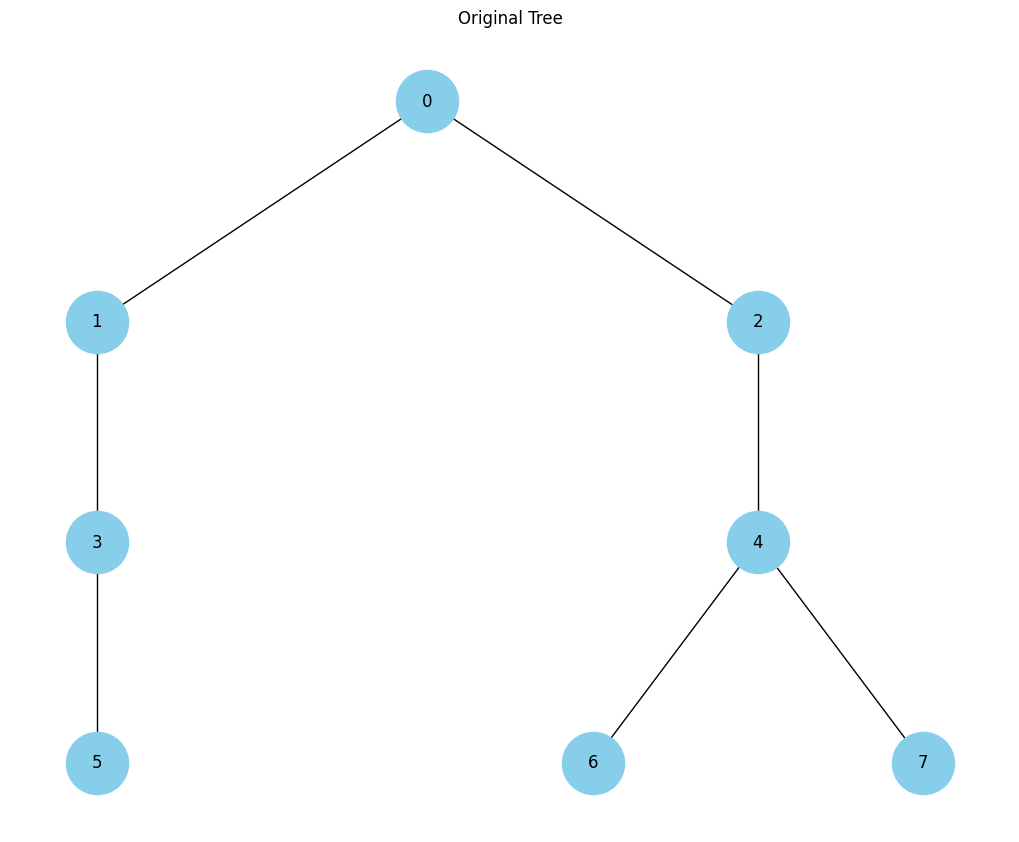

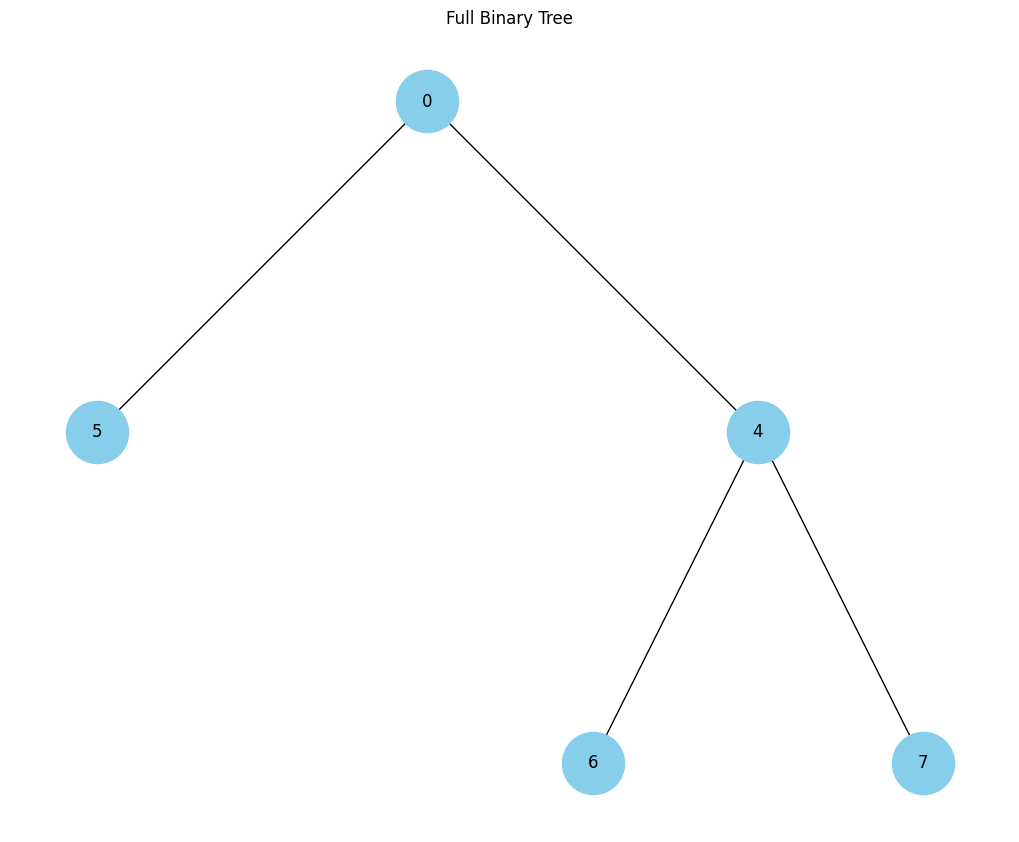

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

class TreeNode:
    def __init__(self, value=0, left=None, right=None, index=None):
        self.value = value
        self.left = left
        self.right = right
        self.index = index

def make_full_binary_tree(node):
    if not node:
        return None

    # Recursively prune the left and right subtrees
    node.left = make_full_binary_tree(node.left)
    node.right = make_full_binary_tree(node.right)

    # If the node has only one child, return that child
    if not node.left and node.right:
        return node.right
    if node.left and not node.right:
        return node.left

    # If the node has two children or no children, return the node itself
    return node

def index_tree(node, index=0):
    if not node:
        return None, index
    node.index = index
    index += 1
    node.left, index = index_tree(node.left, index)
    node.right, index = index_tree(node.right, index)
    return node, index

def build_graph(node, graph, parent=None):
    if not node:
        return
    graph.add_node(node.index, label=node.value)
    if parent is not None:
        graph.add_edge(parent, node.index)
    build_graph(node.left, graph, node.index)
    build_graph(node.right, graph, node.index)

def draw_tree(node, title):
    graph = nx.DiGraph()
    build_graph(node, graph)
    pos = hierarchy_pos(graph, 0)
    labels = nx.get_node_attributes(graph, 'label')
    plt.figure(figsize=(10, 8))
    nx.draw(graph, pos, labels=labels, with_labels=True, arrows=False, node_size=2000, node_color='skyblue')
    plt.title(title)
    plt.show()

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    pos = _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
    return pos

def _hierarchy_pos(G, root, width = 1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None, parsed = []):
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)

    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph) and parent is not None:
        children.remove(parent)

    if len(children) != 0:
        dx = width / len(children)
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos = _hierarchy_pos(G, child, width = dx, vert_gap = vert_gap, vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos, parent = root, parsed = parsed)

    return pos

# Example usage:
# Construct the tree from the example
root = TreeNode(0)
root.left = TreeNode(1)
root.right = TreeNode(2)
root.left.left = TreeNode(3)
root.left.left.right = TreeNode(5)
root.right.right = TreeNode(4)
root.right.right.left = TreeNode(6)
root.right.right.right = TreeNode(7)

# Index the tree nodes
root, _ = index_tree(root)

# Draw the original tree
draw_tree(root, "Original Tree")

# Convert to a full binary tree
new_root = make_full_binary_tree(root)

# Re-index the new tree nodes
new_root, _ = index_tree(new_root)

# Draw the full binary tree
draw_tree(new_root, "Full Binary Tree")
